# 4. Linear classification

### We will use logistic regression to estimate the presence/absense of forest using climate conditions, and evaluate model accuracy

### You will need to download all AK*.npy datasets from Carmen Canvas and put them in the ../Data/ folder. 

### 0. Import modules and define functions to visualize maps

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set(style='ticks',font_scale=1.75)
import statsmodels.api as sm

def plot_map(lc,cmap=mpl.cm.inferno,vmin=0, vmax=1,title='Fig',savefig=False): 
    plt.figure(figsize=(lc.shape[0]/50,lc.shape[1]/50))
    plt.imshow(lc,cmap=cmap,vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.xticks([]);plt.yticks([])
    plt.title(title)
    if savefig: plt.savefig(title+'.png',dpi=300,bbox_inches='tight')

def plotLC(A,title='Land cover type',savefig=False):
    LClist = ['E Forest','D Forest','Shrubland','Herbaceous','Sparse V','Barren','Fen','Bog','Shallow']
    cmap = plt.cm.tab20c # define the colormap
    cmaplist = [cmap(i) for i in range(0,cmap.N,2)]
    
    # create a new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    bounds = np.arange(0.5,10.5,1)
    mynorm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    # define the bins and normalize
    mask = np.isnan(A)
    
    plt.figure(figsize=(A.shape[0]/50,A.shape[1]/50))
    plt.imshow(np.ma.array(A,mask=mask),cmap=cmap,norm=mynorm); 
    cbar = plt.colorbar(ticks=np.arange(1,10))
    cbar.ax.set_yticklabels(LClist) 
    plt.xticks([]); plt.yticks([])
    plt.title(title)
    if savefig: plt.savefig(title+'.png',dpi=300,bbox_inches='tight')

### 1. Load data and visualize

In [8]:
inpath = '../Data'
savefig = False

LC = np.load(inpath+'AK_landcover.npy')
plotLC(LC,title='Land cover type',savefig=savefig)

DD5 = np.load(inpath+'AK_DD5.npy')
plot_map(DD5,cmap = 'PuOr_r',vmin=0, vmax =1500,title='Degree days above 5 $^{\circ}$C',savefig=savefig)

## Read and visualize data
## =======================================================================================
## Plot out the map of elevation (AK_elevation.npy) 
Ele = np.load(inpath+'AK_elevation.npy')
plot_map(Ele,cmap = 'PuOr_r',vmin=0, vmax =1500,title='Elevation (m)',savefig=savefig)


## Plot out the map of precipiation as snow (AK_PAS.npy)
PAS = np.load(inpath+'AK_PAS.npy')
plot_map(PAS,cmap = 'PuOr_r',vmin=0, vmax =339,title='Precipitation as snow (m)',savefig=savefig)

# How to find out the proper value for vmax?
# print(np.nanmin(PAS),np.nanmedian(PAS),np.nanmax(PAS))
# print(np.nanquantile(PAS,0.25),np.nanquantile(PAS,0.75))
print([np.nanquantile(PAS,qt) for qt in [0.05,0.25,0.5,0.75,0.95]])

# for qt in [0.05,0.25,0.5,0.75,0.95]:
#     print(np.nanquantile(PAS,qt))

## =======================================================================================


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\dbryant\AppData\Local\Temp\ipykernel_2700\1971254028.py:8: SyntaxWarning: invalid escape sequence '\c'
  plot_map(DD5,cmap = 'PuOr_r',vmin=0, vmax =1500,title='Degree days above 5 $^{\circ}$C',savefig=savefig)


FileNotFoundError: [Errno 2] No such file or directory: '../DataAK_landcover.npy'

### 2. Set up X and y

(400, 450)
(98560,)
[0 0 0 ... 0 0 0]
98560
(98560,)


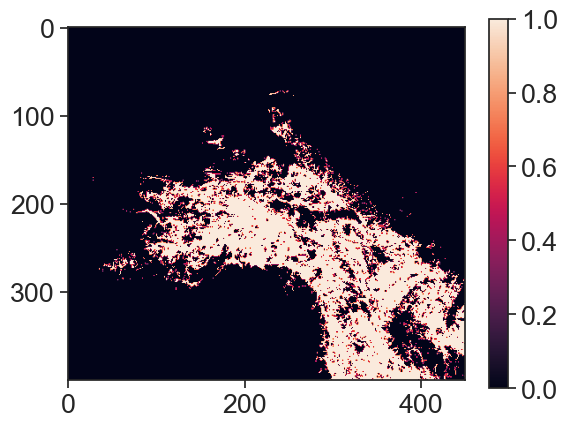

In [7]:
veg_area = ~np.isnan(LC+DD5+Ele+PAS) # A filter that identifies all pixels with valid data
plt.imshow(veg_area); plt.colorbar()

## =======================================================================================
## Create an array named y, representing the presence (y=1) and absence of (y=0) of forest.  
## A pixels is forest when the value of land cover is 1 or 2. 

# LC -> y

y = (LC<3)*1
plt.imshow(y)
print(y.shape)

# Option 1: 
y = y[veg_area]


# Option 2:
# y = y.flatten()
# veg_area = veg_area.flatten()
# y = y[veg_area]

print(y.shape)
print(y)
print(np.nansum(veg_area))


#tmp = np.array([True, False])
#print(tmp*1)


## Create an array named X, in the same shape of y, storing DD5 of corresponding pixels, 
## which will be used to explain y. 
X = DD5[veg_area]
print(X.shape)



# =======================================================================================

### 3. Check the distributions of X and y

In [9]:
## =======================================================================================
## Plot out the density histogram of X and y




# =======================================================================================

### 4. Fit a logistic regression model

In [11]:
## =======================================================================================
## Add a constant column to X
# print(X)
X = sm.add_constant(X)
# print(X)

## Fit logistic regression model, named lg_reg, using sm.Logit().fit() 
lg_reg = sm.Logit(y,X).fit()


## Print out model summary
print(lg_reg.summary())


## =======================================================================================

Optimization terminated successfully.
         Current function value: 0.443151
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                98560
Model:                          Logit   Df Residuals:                    98558
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.3204
Time:                        20:51:42   Log-Likelihood:                -43677.
converged:                       True   LL-Null:                       -64271.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4782      0.042   -154.642      0.000      -6.560      -6.396
x1             0.0075   4.95e

### 5. Estimation the probabilities of forest pressence

[0.96173338]
[0.01321772 0.01382126 0.01054642 ... 0.01614011 0.01773859 0.00938833]


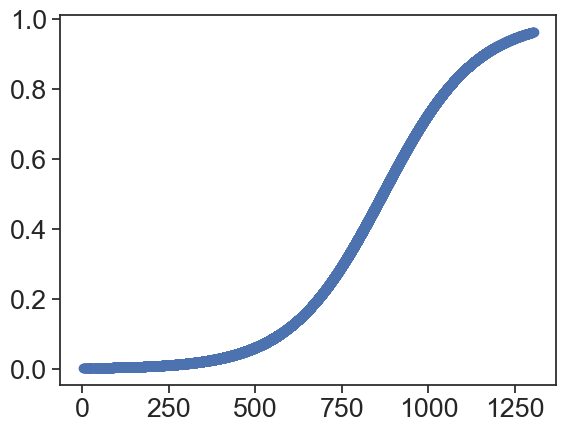

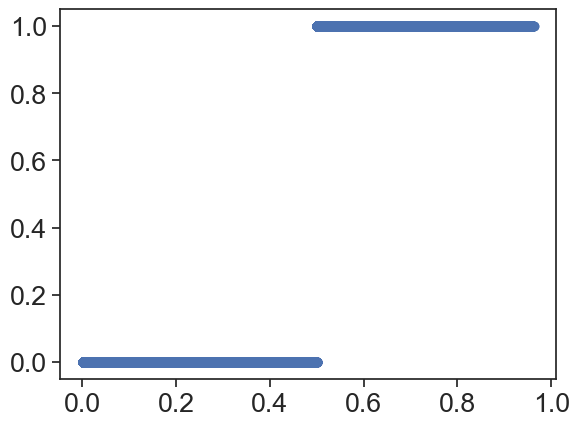

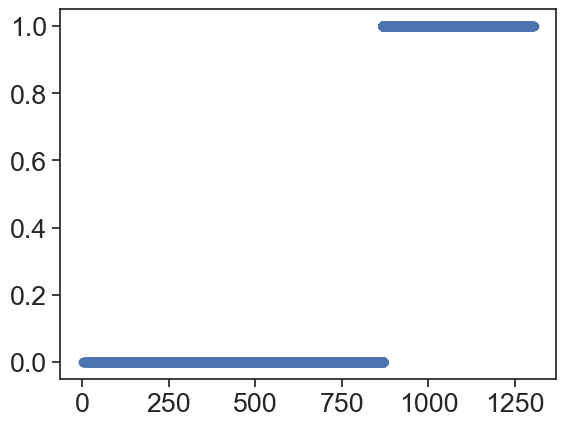

In [13]:
## =======================================================================================
## Estimate the probabilities of forest pressence, named phat, using lg_reg.predict()
phat = lg_reg.predict(np.array([1,1300]))
print(phat)

phat = lg_reg.predict(X)
print(phat)


## Estimate presence/absence of forest, named yhat, based on phat and a cutoff of 0.5
plt.plot(X[:,1],phat,'o')
yhat =  (phat>0.5)*1
plt.figure()
plt.plot(phat,yhat,'o')
plt.figure()
plt.plot(X[:,1],yhat,'o') 


## Calculate the fraction of actural forest cover and the estimated forest cover




## =======================================================================================

### 6. Calculate the overall accuracy score and the confusion matrix

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

## =======================================================================================
## Caculate the accuracy score, named acc, using the imported function accuracy_score() 

acc = accuracy_score(y,yhat)
print(acc)

## Caculate the confusion matrix, named cm, using the imported function confusion_matrix()
cm = confusion_matrix(y,yhat)
print(cm)

## =======================================================================================

0.7865969967532468
[[54508  8794]
 [12239 23019]]


### 7. Plot ROC and cacluate AUC

In [17]:
## =======================================================================================
## Use a for loop to calculate the true postive rate and false positive rate under 
## a range of cutoff thresholds

cutoff_list = np.arange(0.,1.001,0.02)
TPs = []; FPs = [] # initialize true postive rates and false postive rates

# for cutoff in cutoff_list:
#     yhat = 
#     TP = 
#     FP = 
#     TN = 
#     FN = 
#     TPs.append()
#     FPs.append()



## Plot out TPs and 1-FPs with varying cutoff thresholds




## Plot out the ROC curve 




## Calcuate the AUC value



## =======================================================================================


### 8. Bnous exercise: make 2D predictions and maps

In [19]:
## =======================================================================================
## Estimate phat for all pixels in the domain (including nan pixels), named phat_2d, 
## with the same shape of LC. 


## Create 2D arrays storing estimated and actural presence/absence of forests, named 
## yhat_2d and y_2d, respectively. 


## Plot spatial maps of phat_2d, yhat_2d, and y_2d




## Create a range of DD5 between 0 to 1500, estimate the response of precited probability 
## of forest presence. 



# =======================================================================================





